Training and Testing Data
=====================================
To evaluate how well our supervised models generalize, we can split our data into a training and a test set:

<img src="figures/train_test_split.svg" width="100%">


In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X, y = iris.data, iris.target

classifier = KNeighborsClassifier()

Thinking about how machine learning is normally performed, the idea of a train/test split makes sense. Real world systems train on the data they have, and as other data comes in (from customers, sensors, or other sources) the classifier that was trained must predict on fundamentally *new* data. We can simulate this during training using a train/test split - the test data is a simulation of "future data" which will come into the system during production. 

Specifically for iris, the labels in iris are sorted, which means that if we split the data using a proportional split, we will get all of specific labels (0 and 1) and very little of another (2). We want to split as illustrated above, but *after* the data has been randomly shuffled.

In [2]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

To get an accurate simulation of the real world, we will shuffle our data then split.

In [3]:
import numpy as np
rng = np.random.RandomState(0)

permutation = rng.permutation(len(X))
X, y = X[permutation], y[permutation]
print(y)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0
 0 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1
 2 0]


Now we need to split the data into training and testing. Luckily, this is a common pattern in machine learning and scikit-learn has a prebuilt function to split data into training and testing for you. Here we use 50% of the data as training, and 50% testing. 80% and 20% is another common split, but there are no hard and fast rules. The most important thing is to fairly evaluate your system on data it *has not* seen during training!

In [4]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, random_state=1999)
print("Labels for training and testing data")
print(train_y)
print(test_y)

Labels for training and testing data
[0 1 1 2 2 2 0 2 2 1 1 2 2 1 1 1 1 1 0 2 2 2 1 0 2 1 1 2 1 0 2 2 0 2 2 0 2
 1 0 2 0 2 2 2 0 2 0 0 1 0 1 0 2 1 1 0 1 2 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1
 2]
[1 0 1 2 2 1 1 0 1 0 0 2 2 2 1 0 2 0 2 1 0 0 0 2 1 1 1 1 1 0 2 2 2 2 0 1 0
 1 2 1 2 2 1 2 2 1 0 2 0 2 1 2 0 0 2 0 2 1 2 1 0 1 0 1 0 2 2 0 0 0 1 0 1 0
 1]


By evaluating our classifier performance on data that has been seen during training, we could get false confidence in the power of our system. This might lead to putting a system into production which *fails* at predicting new data! It is much better to use a train/test split in order to properly see how your trained model is doing on new data.

In [6]:
classifier.fit(train_X, train_y)
pred_y = classifier.predict(test_X)
print("Fraction Correct")
print(np.sum(pred_y == test_y) / float(len(test_y)))

Fraction Correct
0.96


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


We can also visualize the correct and failed predictions

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
correct_idx = np.where(pred_y == test_y)[0]
print(correct_idx)
incorrect_idx = np.where(pred_y != test_y)[0]
print(incorrect_idx)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 25
 26 27 28 29 30 31 32 33 34 35 36 37 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 73 74]
[24 38 72]


/home/vlad/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


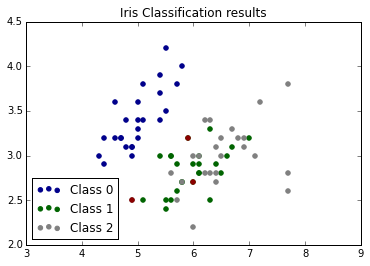

In [8]:
# Plot two dimensions
colors = ["darkblue", "darkgreen", "gray"]
for n, color in enumerate(colors):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_X[idx, 0], test_X[idx, 1], color=color, label="Class %s" % str(n))
plt.scatter(test_X[incorrect_idx, 0], test_X[incorrect_idx, 1], color="darkred")
# Make xlim larger to accommodate legend
plt.xlim(3, 9)
plt.legend(loc=3)
plt.title("Iris Classification results")
plt.show()

We can see that the errors occur in the area where green (class 1) and gray (class 2) overlap. This gives us insight about what features to add - any feature which helps separate class 1 and class 2 should improve classifier performance.